# Description
A/B testing helps in finding a better approach to finding customers, marketing products, getting a higher reach, or anything that helps a business convert most of its target customers into actual customers.

Below are all the features in the dataset:

Campaign Name: The name of the campaign

Date: Date of the record

Spend: Amount spent on the campaign in dollars

of Impressions: Number of impressions the ad crossed through the campaign

Reach: The number of unique impressions received in the ad

of Website Clicks: Number of website clicks received through the ads

of Searches: Number of users who performed searches on the website

of View Content: Number of users who viewed content and products on the website

of Add to Cart: Number of users who added products to the cart

of Purchase: Number of purchases
Two campaigns were performed by the company:

Control Campaign
Test Campaign



In [3]:
#reach to the drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") #this is for avoiding undesired warnings from the outputs

In [6]:
import pandas as pd
control_data = pd.read_csv("/content/drive/MyDrive/Data Projects/A B Testing/control_group.csv", sep = ";")
test_data = pd.read_csv("/content/drive/MyDrive/Data Projects/A B Testing/test_group.csv", sep = ";")

# Data Exploration

In [7]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


Renaming Var


In [9]:
control_data.rename(columns ={ 'Campaign Name': 'Campaign_Name',
    'Date': 'Date',
    'Spend [USD]': 'Spend_USD',
    '# of Impressions': 'Impressions',
    'Reach': 'Reach',
    '# of Website Clicks': 'Website_Clicks',
    '# of Searches': 'Searches',
    '# of View Content': 'View_Content',
    '# of Add to Cart': 'Add_to_Cart',
    '# of Purchase': 'Purchases'},inplace=True)

In [10]:
test_data.rename(columns={'Campaign Name': 'Campaign_Name',
    'Date': 'Date',
    'Spend [USD]': 'Spend_USD',
    '# of Impressions': 'Impressions',
    'Reach': 'Reach',
    '# of Website Clicks': 'Website_Clicks',
    '# of Searches': 'Searches',
    '# of View Content': 'View_Content',
    '# of Add to Cart': 'Add_to_Cart',
    '# of Purchase': 'Purchases'}, inplace=True)

In [11]:
control_data.head(10)

,Campaign_Name,Date,Spend_USD,Impressions,Reach,Website_Clicks,Searches,View_Content,Add_to_Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0


In [12]:
test_data.head(10)

,Campaign_Name,Date,Spend_USD,Impressions,Reach,Website_Clicks,Searches,View_Content,Add_to_Cart,Purchases
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768
5,Test Campaign,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431
8,Test Campaign,9.08.2019,2652,45511,31598,8259,2899,2761,1200,845
9,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275


In [13]:
print(control_data.shape)
print(test_data.shape)

(30, 10)
(30, 10)


In [14]:
print("Control Data: ")
print(control_data.isnull().sum())
print()
print("Test Data: ")
print(test_data.isnull().sum())

Control Data: 
Campaign_Name     0
Date              0
Spend_USD         0
Impressions       1
Reach             1
Website_Clicks    1
Searches          1
View_Content      1
Add_to_Cart       1
Purchases         1
dtype: int64

Test Data: 
Campaign_Name     0
Date              0
Spend_USD         0
Impressions       0
Reach             0
Website_Clicks    0
Searches          0
View_Content      0
Add_to_Cart       0
Purchases         0
dtype: int64


In [15]:
print(control_data.describe())
print()
print(test_data.describe())

         Spend_USD    Impressions          Reach  Website_Clicks     Searches  \
count    30.000000      29.000000      29.000000       29.000000    29.000000   
mean   2288.433333  109559.758621   88844.931034     5320.793103  2221.310345   
std     367.334451   21688.922908   21832.349595     1757.369003   866.089368   
min    1757.000000   71274.000000   42859.000000     2277.000000  1001.000000   
25%    1945.500000   92029.000000   74192.000000     4085.000000  1615.000000   
50%    2299.500000  113430.000000   91579.000000     5224.000000  2390.000000   
75%    2532.000000  121332.000000  102479.000000     6628.000000  2711.000000   
max    3083.000000  145248.000000  127852.000000     8137.000000  4891.000000   

       View_Content  Add_to_Cart   Purchases  
count     29.000000    29.000000   29.000000  
mean    1943.793103  1300.000000  522.793103  
std      777.545469   407.457973  185.028642  
min      848.000000   442.000000  222.000000  
25%     1249.000000   930.000000  3

As we can se that the mean is close to 50% we can replace missing values with mean.


In [16]:
columns_to_fill = ['Impressions', 'Reach', 'Website_Clicks', 'Searches', 'View_Content', 'Add_to_Cart', 'Purchases']


In [17]:
means = control_data[columns_to_fill].mean()
means

Impressions       109559.758621
Reach              88844.931034
Website_Clicks      5320.793103
Searches            2221.310345
View_Content        1943.793103
Add_to_Cart         1300.000000
Purchases            522.793103
dtype: float64

In [18]:
control_data[columns_to_fill] = control_data[columns_to_fill].fillna(means)
control_data[columns_to_fill].isnull().sum()

Impressions       0
Reach             0
Website_Clicks    0
Searches          0
View_Content      0
Add_to_Cart       0
Purchases         0
dtype: int64

In [19]:
print(control_data.isnull().sum())
print()
print(test_data.isnull().sum())

Campaign_Name     0
Date              0
Spend_USD         0
Impressions       0
Reach             0
Website_Clicks    0
Searches          0
View_Content      0
Add_to_Cart       0
Purchases         0
dtype: int64

Campaign_Name     0
Date              0
Spend_USD         0
Impressions       0
Reach             0
Website_Clicks    0
Searches          0
View_Content      0
Add_to_Cart       0
Purchases         0
dtype: int64


In [20]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Campaign_Name   30 non-null     object 
 1   Date            30 non-null     object 
 2   Spend_USD       30 non-null     int64  
 3   Impressions     30 non-null     float64
 4   Reach           30 non-null     float64
 5   Website_Clicks  30 non-null     float64
 6   Searches        30 non-null     float64
 7   View_Content    30 non-null     float64
 8   Add_to_Cart     30 non-null     float64
 9   Purchases       30 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


We have two types of campaigns: Control Campaign and Test Campaign. Here’s how you might approach analysing the data:

Compare Campaign Performance:

Objective: Compare the effectiveness of the Control Campaign versus the Test Campaign.
Metrics: Spend, Impressions, Reach, Website Clicks, Searches, View Content, Add to Cart, and Purchases.
Analysis: Perform statistical tests to determine if there are significant differences between the two campaigns in terms of any of the metrics.
Predictive Modeling:

Objective: Predict key outcomes (e.g., Purchases) based on other metrics.
Predictive Variable (Target): Purchases.
Features (Predictors): Spend, Impressions, Reach, Website Clicks, Searches, View Content, Add to Cart.

In [21]:
control_data = control_data.drop(columns=['Date', 'Campaign_Name'])
test_data = test_data.drop(columns=['Date', 'Campaign_Name'])


#Visualisation

We will build a correlation matrix to analyse the relationships between variables in our dataset. This will help us identify how strongly each variable is related to the others. High correlations between variables can indicate redundancy, where multiple variables convey similar information, which might lead to multicollinearity issues in predictive modeling. Understanding these correlations allows us to make informed decisions about feature selection and preprocessing to improve the quality of our analysis or model performance

<Axes: >

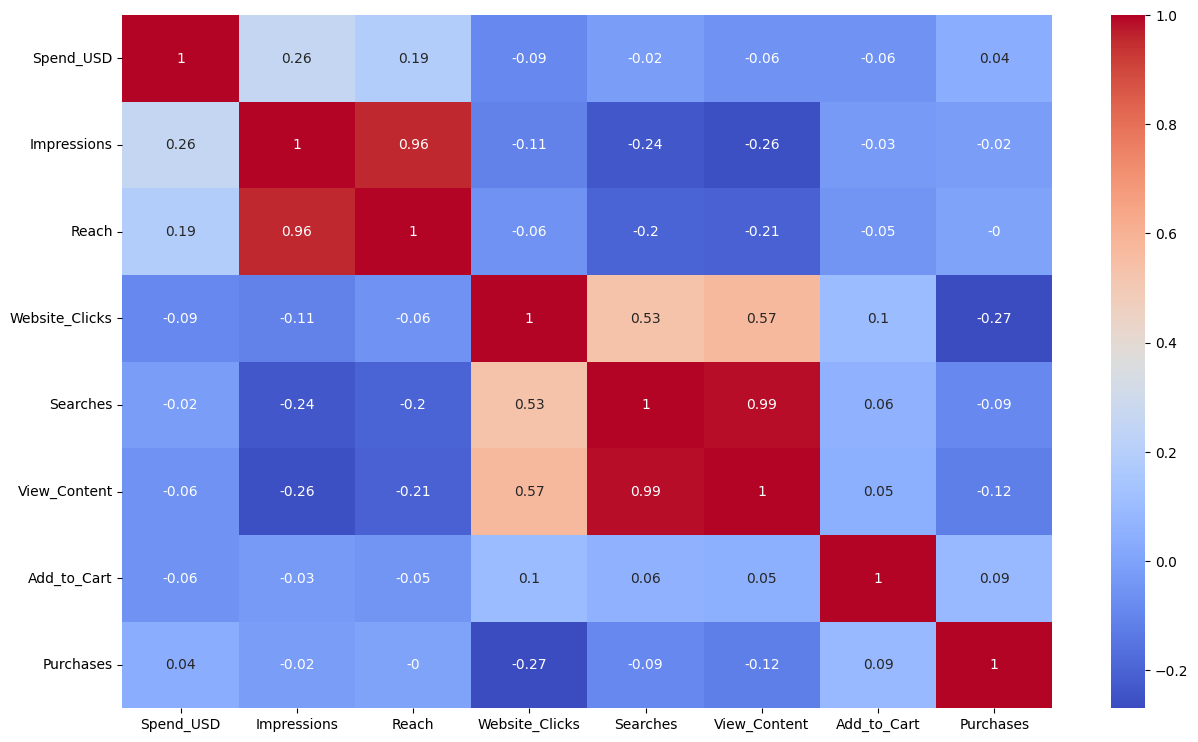

In [22]:
plt.figure(figsize = (15,9))

control_data.corr()
correlation = control_data.corr().round(2)

mask = np.triu(np.ones_like(control_data.corr(method = "pearson")))
sns.heatmap(correlation, annot = True, cmap = "coolwarm")

<Axes: >

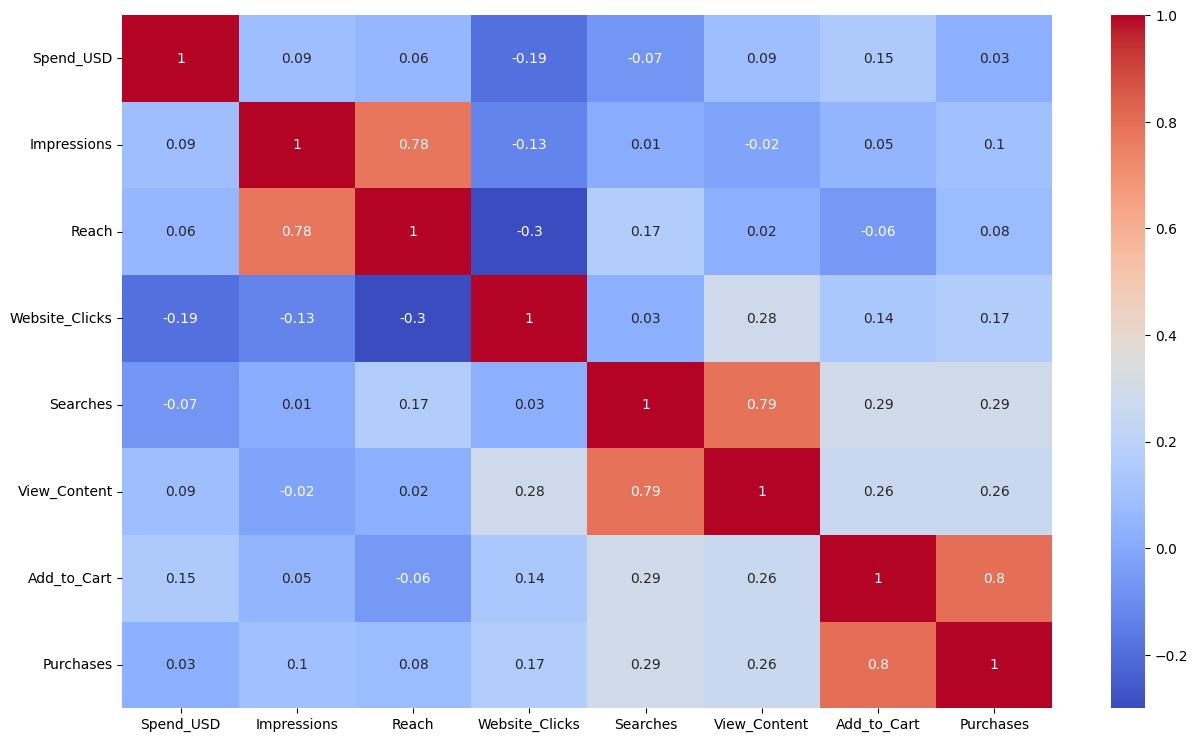

In [23]:
plt.figure(figsize = (15,9))

test_data.corr()
correlation = test_data.corr().round(2)

mask = np.triu(np.ones_like(test_data.corr(method = "pearson")))
sns.heatmap(correlation, annot = True, cmap = "coolwarm")

In [24]:
control_data = control_data.drop(columns=['Impressions'])
test_data = test_data.drop(columns=['Impressions'])

In [25]:
print(control_data.columns)
print(test_data.columns)

Index(['Spend_USD', 'Reach', 'Website_Clicks', 'Searches', 'View_Content',
       'Add_to_Cart', 'Purchases'],
      dtype='object')
Index(['Spend_USD', 'Reach', 'Website_Clicks', 'Searches', 'View_Content',
       'Add_to_Cart', 'Purchases'],
      dtype='object')


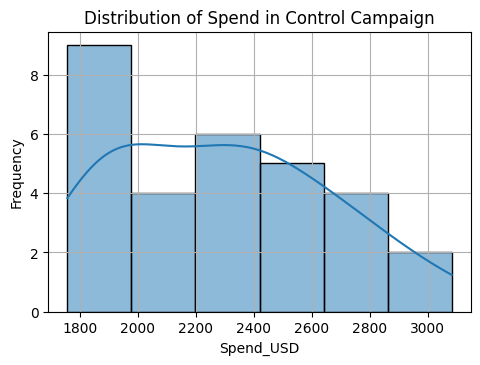

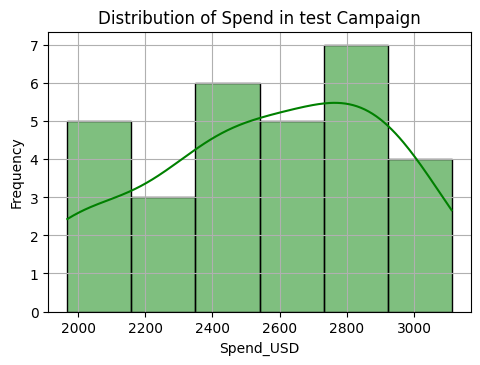

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Control Data
plt.figure(figsize=(12, 8))

# Total Spend
plt.subplot(2, 2, 1)
sns.histplot(control_data['Spend_USD'], kde=True)
plt.title('Distribution of Spend in Control Campaign')
plt.xlabel('Spend_USD')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Total Spend
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(test_data['Spend_USD'], kde=True, color = 'green')
plt.title('Distribution of Spend in test Campaign')
plt.xlabel('Spend_USD')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

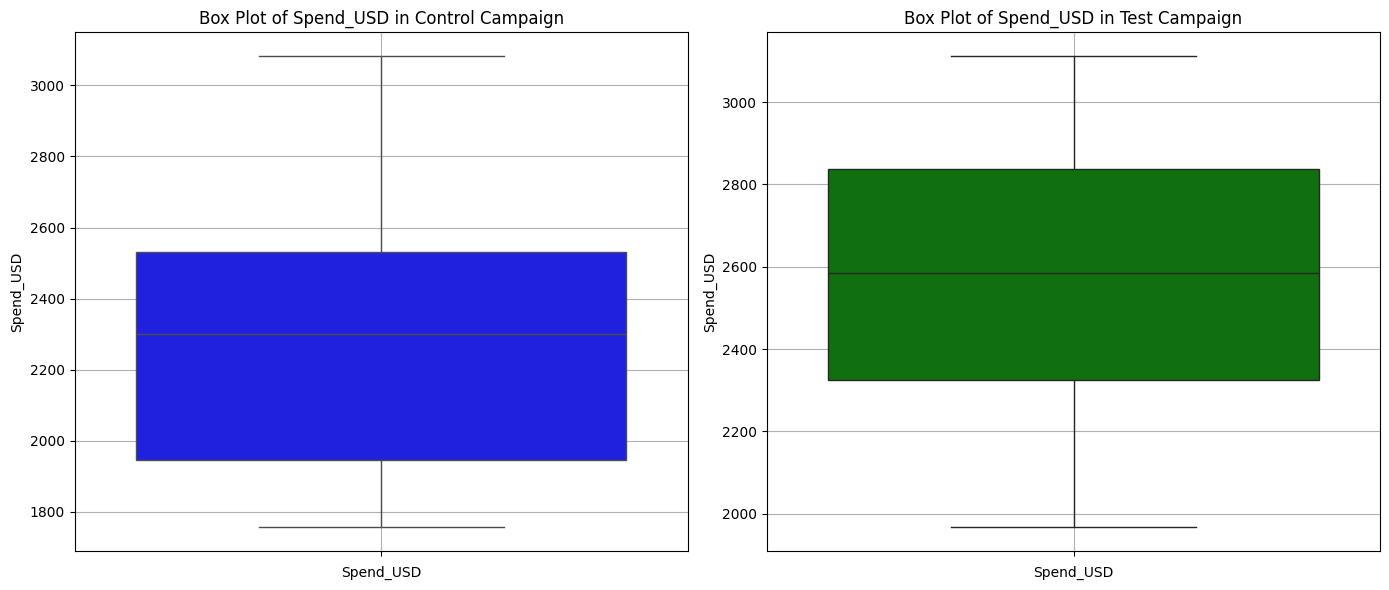

In [27]:
# Create a figure with two subplots side by side (horizontal layout)
plt.figure(figsize=(14, 6))

# Box Plot for Control Data
plt.subplot(1, 2, 1)
sns.boxplot(y=control_data['Spend_USD'], color='blue')
plt.title('Box Plot of Spend_USD in Control Campaign')
plt.xlabel('Spend_USD')
plt.grid(True)

# Box Plot for Test Data
plt.subplot(1, 2, 2)
sns.boxplot(y=test_data['Spend_USD'], color='green')
plt.title('Box Plot of Spend_USD in Test Campaign')
plt.xlabel('Spend_USD')
plt.grid(True)

plt.tight_layout()
plt.show()

From the visualizations, it is evident that the second campaign had a higher level of investment compared to the first. However, to fully understand which specific metrics improved and how they contributed to the campaign's performance, further analysis is required. This deeper research should focus on evaluating the changes in key performance indicators (KPIs) and assessing how different metrics such as impressions, clicks, and purchases evolved over time. By doing so, we can gain insights into which aspects of the campaign were optimized and identify potential areas for further improvement.

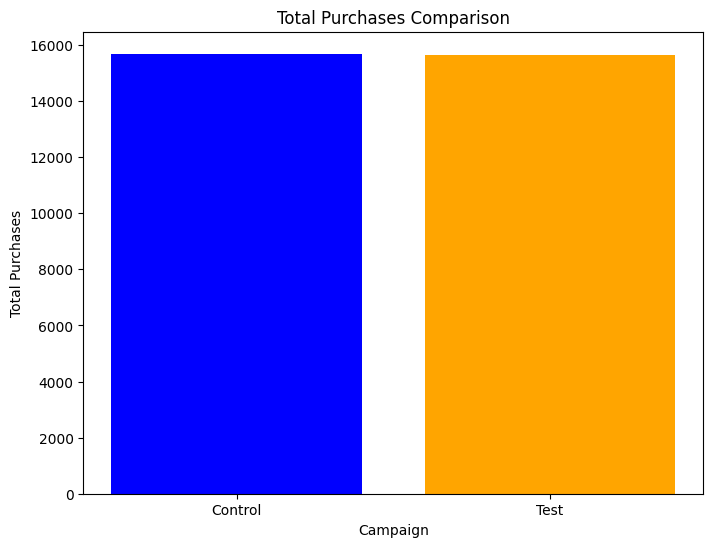

In [28]:
# Calculate total purchases for both datasets
total_purchases_control = control_data['Purchases'].sum()
total_purchases_test = test_data['Purchases'].sum()

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Campaign': ['Control', 'Test'],
    'Total Purchases': [total_purchases_control, total_purchases_test]
})

# Plot
plt.figure(figsize=(8, 6))
plt.bar(comparison_df['Campaign'], comparison_df['Total Purchases'], color=['blue', 'orange'])
plt.title('Total Purchases Comparison')
plt.xlabel('Campaign')
plt.ylabel('Total Purchases')
plt.show()

Based on the analysis, both campaigns performed well in terms of generating purchases, but there were differences in the amount of money spent. The next step is to delve deeper into the data to understand which specific metrics were improved with the increased investment. This involves examining the relationship between spending and key performance indicators (KPIs) such as impressions, clicks, and other engagement metrics to identify which aspects of the campaigns were optimized better with higher investmen

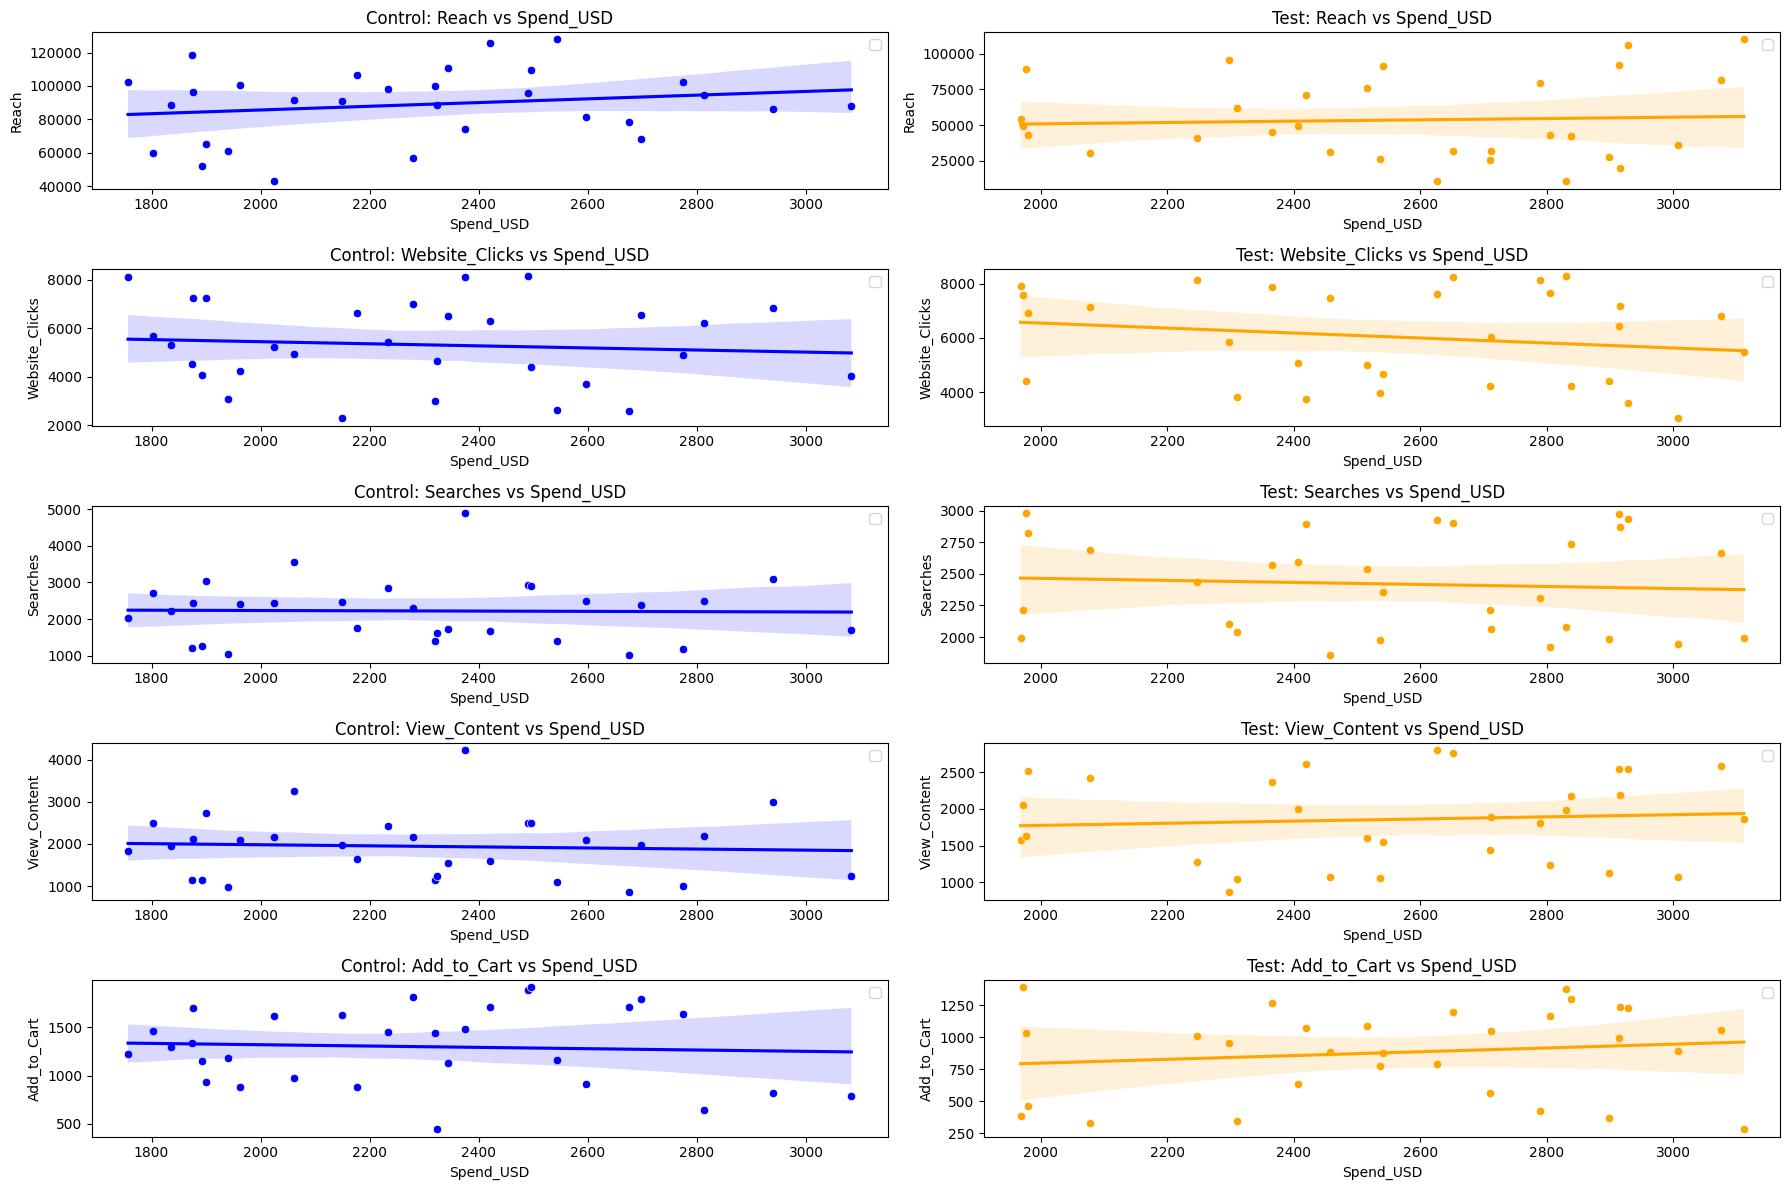

In [29]:
# List of variables to compare with Spend_USD
variables_to_compare = ['Reach', 'Website_Clicks', 'Searches', 'View_Content', 'Add_to_Cart']

# Set up the matplotlib figure
plt.figure(figsize=(18, 12))  # Adjust size if necessary

# Plot scatter plots with linear regression for Control Data
for i, var in enumerate(variables_to_compare, 1):
    plt.subplot(len(variables_to_compare), 2, 2*i-1)
    sns.scatterplot(x=control_data['Spend_USD'], y=control_data[var], color='blue')
    sns.regplot(x=control_data['Spend_USD'], y=control_data[var], scatter=False, color='blue', line_kws={'label': 'Control Linear Fit'})
    plt.title(f'Control: {var} vs Spend_USD')
    plt.xlabel('Spend_USD')
    plt.ylabel(var)
    plt.legend()

# Plot scatter plots with linear regression for Test Data
for i, var in enumerate(variables_to_compare, 1):
    plt.subplot(len(variables_to_compare), 2, 2*i)
    sns.scatterplot(x=test_data['Spend_USD'], y=test_data[var], color='orange')
    sns.regplot(x=test_data['Spend_USD'], y=test_data[var], scatter=False, color='orange', line_kws={'label': 'Test Linear Fit'})
    plt.title(f'Test: {var} vs Spend_USD')
    plt.xlabel('Spend_USD')
    plt.ylabel(var)
    plt.legend()

plt.tight_layout()
plt.show()

# Statistical testing

t- test

To determine if there are significant differences between the Control and Test campaigns in terms of various metrics, we can perform independent two-sample t-tests. This will help us identify if the differences in the means of the metrics are statistically significant.


Metrics with p-values < 0.05 indicate a statistically significant difference between the Control and Test campaigns.

In [30]:
from scipy import stats

In [32]:
# Perform t-test for each metric
metrics = ['Spend_USD', 'Reach', 'Website_Clicks', 'Searches', 'View_Content', 'Add_to_Cart', 'Purchases']

t_test_results = {}
for metric in metrics:
    t_stat, p_value = stats.ttest_ind(control_data[metric], test_data[metric])
    t_test_results[metric] = {'t-statistic': t_stat, 'p-value': p_value}

# Print the results
for metric, results in t_test_results.items():
    print(f"{metric} - t-statistic: {results['t-statistic']:.4f}, p-value: {results['p-value']:.4f}")

Spend_USD - t-statistic: -2.9700, p-value: 0.0043
Reach - t-statistic: 5.3926, p-value: 0.0000
Website_Clicks - t-statistic: -1.6043, p-value: 0.1141
Searches - t-statistic: -1.1571, p-value: 0.2520
View_Content - t-statistic: 0.4844, p-value: 0.6299
Add_to_Cart - t-statistic: 4.3230, p-value: 0.0001
Purchases - t-statistic: 0.0307, p-value: 0.9756


We can see that we have a couple of metrix with p-value<0.05 such us:
- Spend USD
- Websites Clicks
- Add to Cart
They indicate the signifcan differnce.

Metrics with p-values => 0.05 such us:
- Reach
- Searches
- View Content
- Purcahses

Do not statisticaly significant for both compaines.

After performing the t-tests, we can analyze the results by comparing the means and looking at the significance levels (p-values).


Means Comparison: Compare the means of both campaigns for each metric to determine which one is performing better.

In [33]:
# Calculate means for each metric in both campaigns
control_means = control_data[metrics].mean()
test_means = test_data[metrics].mean()

# Display the means
print("Control Campaign Means:")
print(control_means)
print("\nTest Campaign Means:")
print(test_means)

Control Campaign Means:
Spend_USD          2288.433333
Reach             88844.931034
Website_Clicks     5320.793103
Searches           2221.310345
View_Content       1943.793103
Add_to_Cart        1300.000000
Purchases           522.793103
dtype: float64

Test Campaign Means:
Spend_USD          2563.066667
Reach             53491.566667
Website_Clicks     6032.333333
Searches           2418.966667
View_Content       1858.000000
Add_to_Cart         881.533333
Purchases           521.233333
dtype: float64


# Result

Spend USD. Significant differnece (p<0.5) with test compaign spending more.

Website clicks. Significant difference (p<value) with test compaign having more clicks.

Add to card. Significant difference (p<value) with control compaign having more clicks.

Overall Performace

The test compaign performing better in Website clicks. Clicks is the crutial metrics for online engagemnt. Ad compaing always try to minimise price per click.

The controll compaing perform better in terms of Add to Card. This is the indication for higher ourchase intention.

Spend USD is highe in the test compaign. It aslo work well with clicks. So can suggest higher investment into the compian.


